In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

## Dilation


- dst = cv2.dilate(src, kernel[, dst[, anchor[, iterations[, borderType[,
borderValue]]]]] ) with the following arguments:

- src input image; the number of channels can be arbitrary, but the depth should be one of CV_8U,CV_16U, CV_16S, CV_32F or CV_64F.

- dst output image of the same size and type as src.

- kernel structuring element used for dilation; if kernel is not specified, a 3 x 3 rectangular structuring element is used.

- anchor position of the anchor within the element; default value (-1, -1) means that the anchor is at the element center.

- iterations number of times dilation is applied; by default is 1.
borderType pixel extrapolation method.

- borderValue border value in case of a constant border

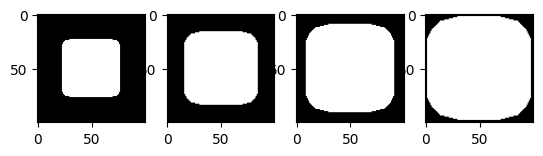

In [3]:
img = np.zeros((100, 100), dtype=np.uint8)
img[30:70, 30:70] = 255
kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))

dst = cv2.dilate(img,kernel, iterations= 1 )
dst1 = cv2.dilate(img,kernel, iterations= 2 )
dst2 = cv2.dilate(img,kernel, iterations= 3 )
dst3 = cv2.dilate(img,kernel, iterations= 4 )


fx,ax = plt.subplots(1,4)
ax[0].imshow(dst,cmap='gray')
ax[1].imshow(dst1,cmap='gray')
ax[2].imshow(dst2,cmap='gray')
ax[3].imshow(dst3,cmap='gray')



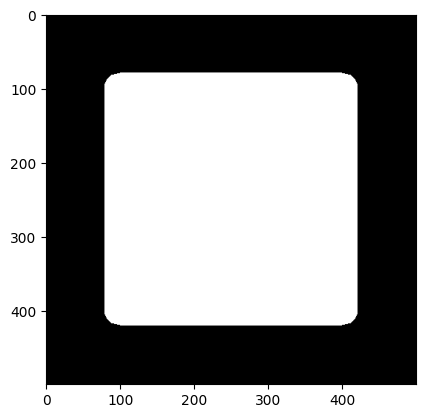

In [4]:
img = np.zeros((500, 500), dtype=np.uint8)
img[100:400, 100:400] = 255

kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
dst = cv2.dilate(img,kernel, iterations= 3)
plt.imshow(dst,cmap='gray')


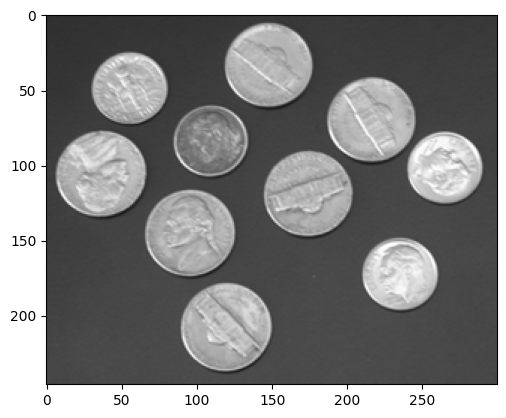

In [5]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/coins.png')
plt.imshow(img)

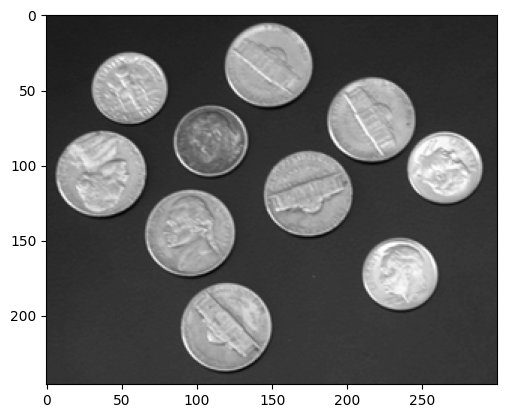

In [6]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

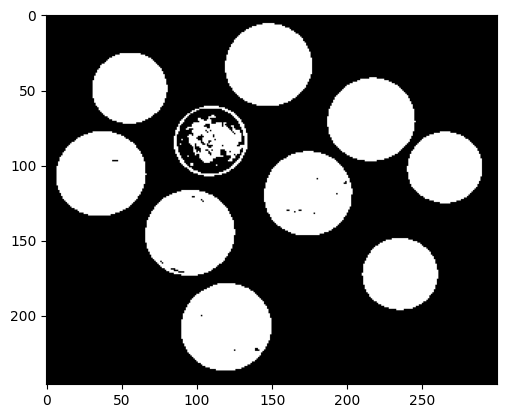

In [7]:
binary = cv2.threshold(gray_img, 127, 1, cv2.THRESH_BINARY)[1]
plt.imshow(binary, cmap='gray')


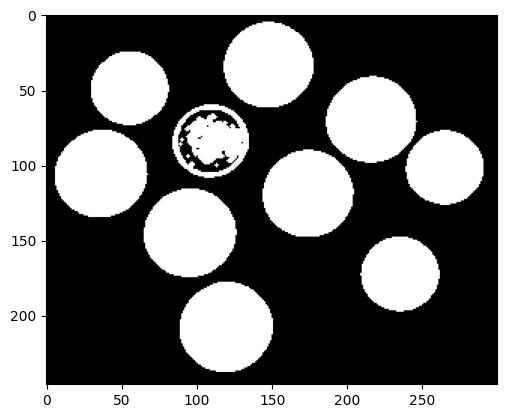

In [8]:
kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))

dst = cv2.dilate(binary,kernel, iterations=1)
plt.imshow(dst, cmap='gray')

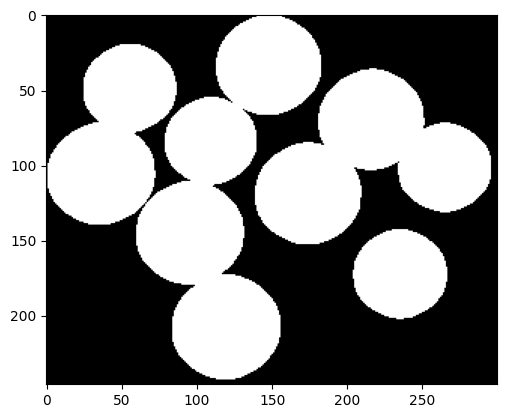

In [9]:
kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

dst = cv2.dilate(binary,kernel, iterations= 2)
plt.imshow(dst, cmap='gray')

(-0.5, 583.5, 383.5, -0.5)

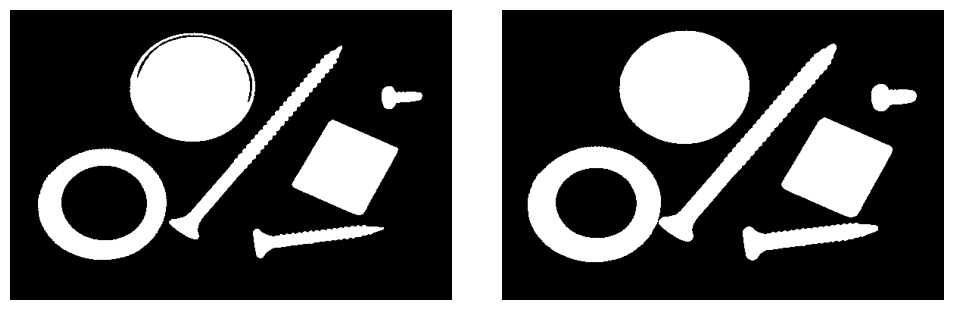

In [10]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/9.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thres = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)[1]

thres = thres - 255
kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
dalition = cv2.dilate(thres, kernel, iterations=1)

fx, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(thres, cmap='gray')
ax[1].imshow(dalition, cmap='gray')
fx.tight_layout()
ax[0].axis('off')
ax[1].axis('off')

## Erosion

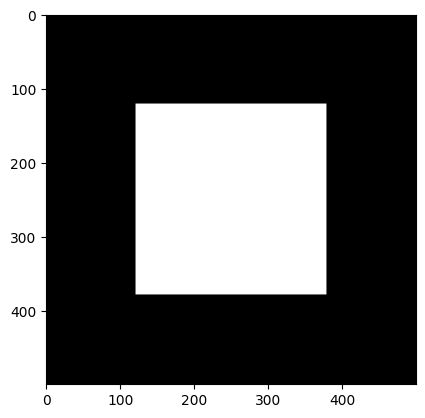

In [11]:
img = np.zeros((500, 500), dtype=np.uint8)
img[100:400, 100:400] = 255

kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))
dst = cv2.erode(img,kernel, iterations= 3)
plt.imshow(dst,cmap='gray')


(-0.5, 583.5, 383.5, -0.5)

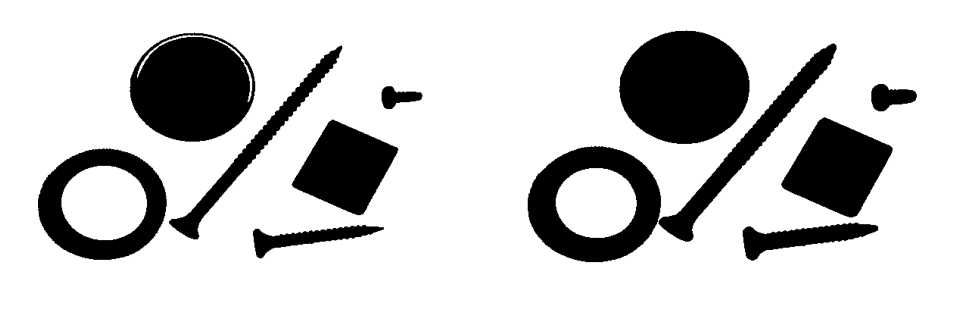

In [12]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/9.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thres = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)[1]


kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))
dalition = cv2.erode(thres, kernel, iterations=1)

fx, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(thres, cmap='gray')
ax[1].imshow(dalition, cmap='gray')
fx.tight_layout()
ax[0].axis('off')
ax[1].axis('off')

(-0.5, 299.5, 245.5, -0.5)

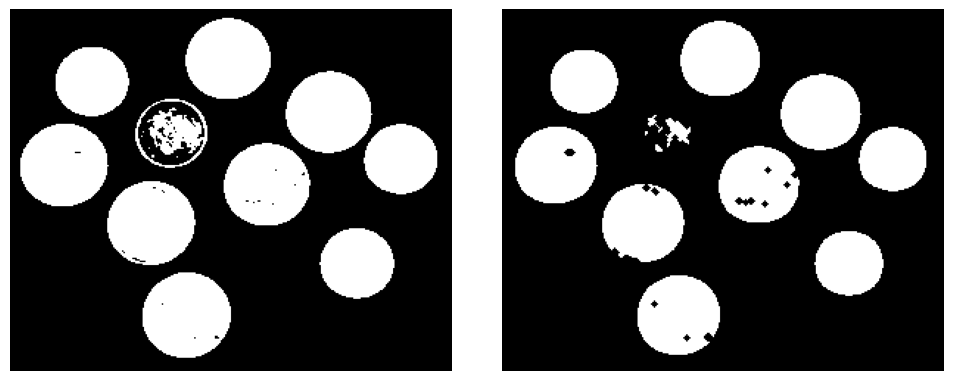

In [13]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/coins.png')

gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
thres = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)[1]

kernel =  cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
erode = cv2.erode(thres, kernel, iterations=2)

fx, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(thres, cmap='gray')
ax[1].imshow(erode, cmap='gray')
fx.tight_layout()
ax[0].axis('off')
ax[1].axis('off')

## Closing and Opening


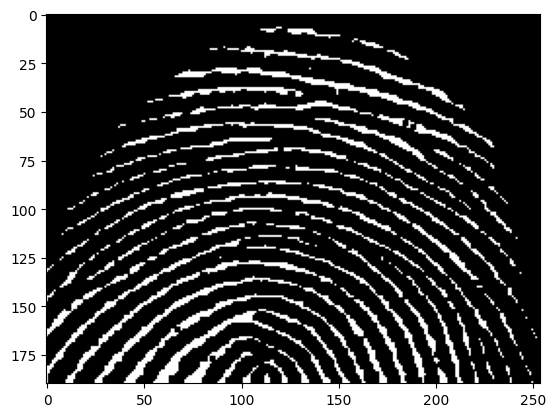

In [14]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/vantay.png')

kernel = np.ones((3,3),np.uint8)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.threshold(img, 60, 255, cv2.THRESH_BINARY)[1]

erode = cv2.erode(img, kernel)

plt.imshow(erode, cmap='gray')

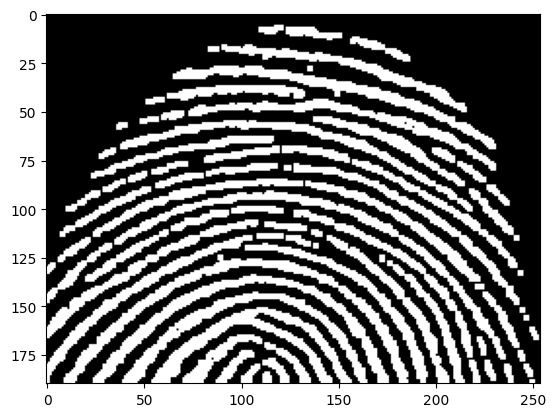

In [15]:
dalition = cv2.dilate(erode, kernel, iterations=1)
plt.imshow(dalition, cmap='gray')

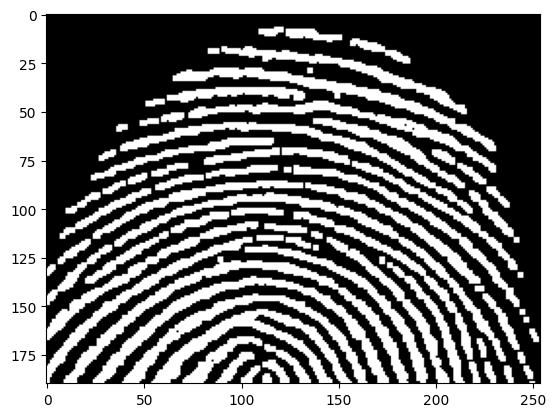

In [16]:
opening = cv2.morphologyEx(dalition, cv2.MORPH_OPEN, (3,3))
plt.imshow(opening, cmap='gray')

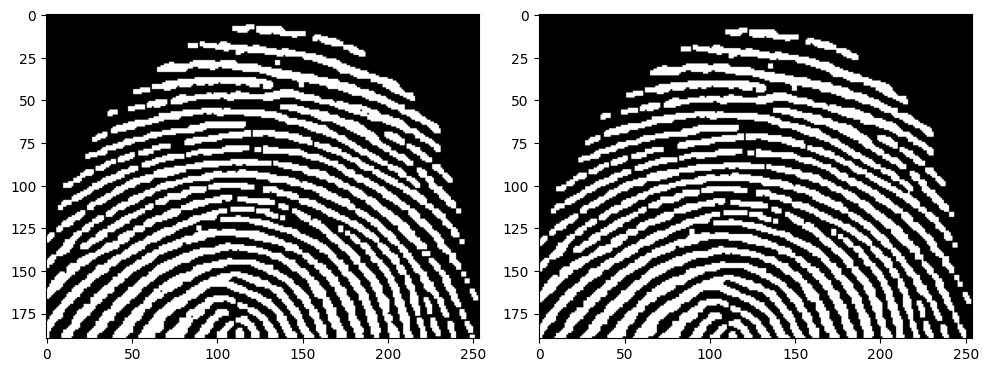

In [17]:
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, (3,3),iterations=1)
# opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, (7,7),iterations=2)

fx, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(dalition, cmap='gray')
ax[1].imshow(closing, cmap='gray')
fx.tight_layout()

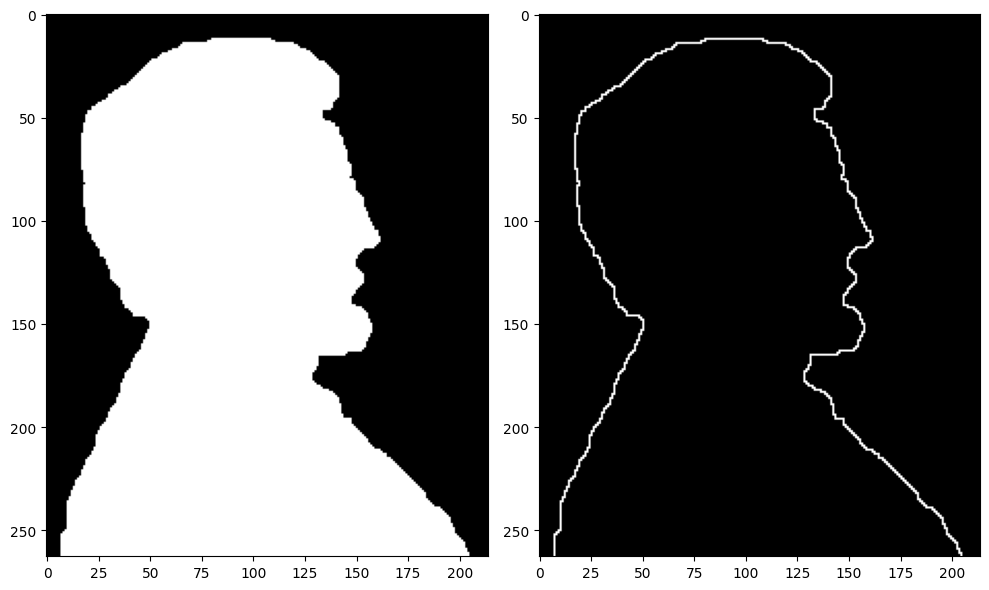

In [18]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/down.png')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)


thres = cv2.threshold(gray_img, 127, 255, cv2.THRESH_BINARY)[1]

kernel =  np.ones((3,3),np.uint8)
erode = cv2.erode(thres, kernel)
# dalition = cv2.dilate(erode, kernel, iterations=1)

rs = thres - erode

fx, ax = plt.subplots(1, 2,figsize=(10,10))
ax[0].imshow(thres, cmap='gray')
ax[1].imshow(rs, cmap='gray')
fx.tight_layout()

## Canny

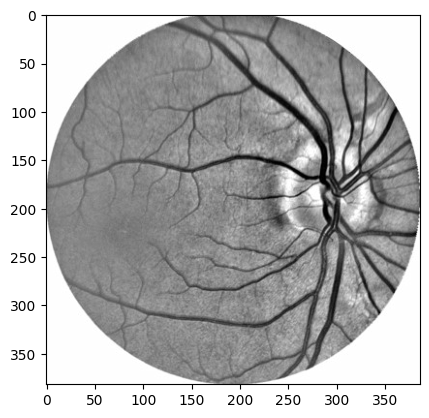

In [19]:
img = cv2.imread('/content/drive/MyDrive/ColabNotebooks/21015721_NguyenThiHongTham_IMG_PROCESSING/IMG/eye.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thres = cv2.threshold(gray_img, 30, 255, cv2.THRESH_BINARY)[1]
thres = thres -255
plt.imshow(gray_img,cmap='gray')
plt.show()

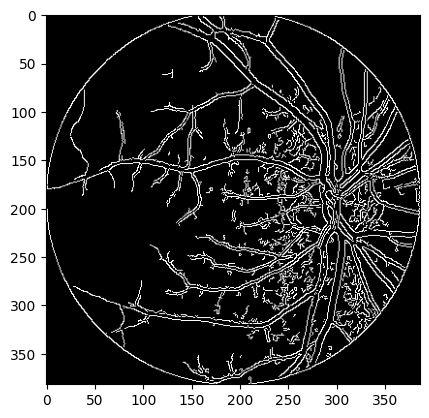

In [20]:
canny = cv2.Canny(gray_img,100,200)
plt.imshow(canny,cmap='gray')
plt.show()